<a href="https://colab.research.google.com/github/cardstud/DS-Unit-2-Applied-Modeling/blob/master/module4/LS_DS_234_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Framigham Cardiovascular study dataset

LOGISTIC REGRESSION - HEART DISEASE PREDICTION

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression Data Preparation

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Demographic: 
- Sex: male or female(Nominal) 
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral 
- Education
- Current Smoker: whether or not the patient is a current smoker (Nominal) 
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history) 
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal) 
- Diabetes: whether or not the patient had diabetes (Nominal) Medical(current)
- Tot Chol: total cholesterol level (Continuous) 
- Sys BP: systolic blood pressure (Continuous) 
- Dia BP: diastolic blood pressure (Continuous) 
- BMI: Body Mass Index (Continuous) 
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) 
- Glucose: glucose level (Continuous) 
- Predict variable (desired target) 
 - 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”) 

#### Columns


*   male
*   age
*   education
*   currentSmoker
*   cigsPerDay
*   BPMeds
*   prevalentStroke
*   prevalentHyp
*   diabetes
*   totChol
*   sysBP
*   diaBP
*   BMI
*   heartRate
*   glucose
*   TenYearCHD

### Import dataset and install/import needed packages/libraries

In [1]:
from google.colab import files
uploaded = files.upload()

Saving framingham.csv to framingham.csv


In [2]:
!pip install category_encoders==2.*
!pip install pandas-profiling==2.*
!pip install plotly==4.*
!pip install eli5
!pip install pdpbox

# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

     |████████████████████████████████| 102kB 2.7MB/s 
     |████████████████████████████████| 133kB 3.5MB/s 
     |████████████████████████████████| 614kB 45.5MB/s 
     |████████████████████████████████| 235kB 44.2MB/s 
     |████████████████████████████████| 307kB 30.0MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 215kB 46.8MB/s 
     |████████████████████████████████| 737kB 45.6MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=11cebacd054f3e4695059f89638adee44c5eb3487fae9185b3acee19bc980ef5
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=1e069addf742ba343ffbef8d9261a267b22ad6a39237c2def0ae92a9c6b9d491
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d

In [0]:
# Ignore this warning: https://github.com/dmlc/xgboost/issues/4300
# xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='xgboost')

### Readin dataset into a DataFrame named hd and check head/shape

In [0]:
hd = pd.read_csv('framingham.csv', header=0)

In [5]:
print(hd.shape)
hd.head()

(4238, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Choose a Target to predict and check its distribution
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)
- Variable name: TenYearCHD

In [6]:
hd.TenYearCHD.value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

There are 2 classes, this is a binary classification problem. The majority class occurs with 85% frequency, so this is a bit imbalanced so I will need to use more than an accuracy score as my evaluation metric

### How is the target distributed

In [7]:
hd['TenYearCHD'].value_counts(normalize=True)

0    0.848042
1    0.151958
Name: TenYearCHD, dtype: float64

### Choose your evaluation metric(s)

In [0]:
# Accuracy score, AUC-ROC curve plots (towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

### Begin to clean and explore your data

In [9]:
hd['education'].nunique()

4

In [10]:
hd['education']

0       4.0
1       2.0
2       1.0
3       3.0
4       3.0
       ... 
4233    1.0
4234    3.0
4235    2.0
4236    1.0
4237    2.0
Name: education, Length: 4238, dtype: float64

#### Drop some high cardinality columns
- None in my set

In [0]:
# example
# df = df.drop(columns=['Notes', 'Location', 'Reviewer', 'Address', 'URL', 'Neighborhood'])

#### Deal with missing values

In [11]:
hd.isna().sum().sort_values(ascending=False)

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
TenYearCHD           0
diaBP                0
sysBP                0
diabetes             0
prevalentHyp         0
prevalentStroke      0
currentSmoker        0
age                  0
male                 0
dtype: int64

In [12]:
hd['glucose'].describe()

count    3850.000000
mean       81.966753
std        23.959998
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [0]:
hd = hd.fillna(hd.mean())

In [14]:
hd.isna().sum().sort_values(ascending=False)

TenYearCHD         0
glucose            0
heartRate          0
BMI                0
diaBP              0
sysBP              0
totChol            0
diabetes           0
prevalentHyp       0
prevalentStroke    0
BPMeds             0
cigsPerDay         0
currentSmoker      0
education          0
age                0
male               0
dtype: int64

### Choose which observations you will use to train, validation and test your model
- Random train_test_split for train, test = (train=.80, test =.20)
- Random train_test_split for train, val =  (train=.80, test=.20)

In [15]:
from sklearn.model_selection import train_test_split
# Split into Train and Test sets
train, test = train_test_split(hd, train_size=.80, test_size=0.20,
                               stratify=hd['TenYearCHD'], random_state=42)
train.shape,  test.shape

((3390, 16), (848, 16))

In [16]:
# Split train into train & val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['TenYearCHD'], random_state=42)

train.shape, val.shape, test.shape

((2712, 16), (678, 16), (848, 16))

##### If wanted to split using dates and changing date using pd.to_datetime example

In [0]:
# hd['Date'] = pd.to_datetime(hd['Date'], infer_datetime_format=True)

In [0]:
# train = hd[hd.Date.dt.year] <= 2016]
# val = hd[hd.Date.dt.year == 2017]
# test =hd[hd.Date.dt.year >= 2018]

## Begin to choose which features, if any, to exclude. Would some features "leak" future information?

What happens if we *DON'T* drop features with leakage?

- Looks like I dont have leakage

In [17]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

target = 'TenYearCHD'
features = hd.columns.drop([target])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=7)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8421828908554573


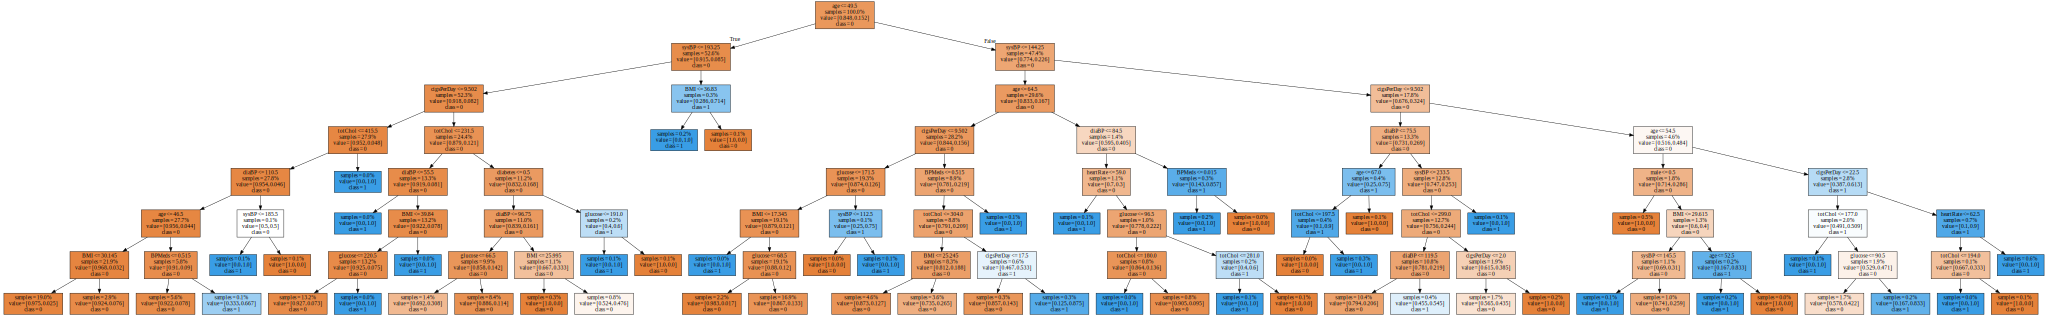

In [18]:
# Visualize decision tree
import graphviz
from sklearn.tree import export_graphviz

tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree, 
    out_file=None, 
    feature_names=X_train.columns, 
    class_names=y_train.unique().astype(str), 
    filled=True, 
    impurity=False, 
    proportion=True)

graphviz.Source(dot_data)

## Get ROC AUC (Receiver Operating Characteristic, Area Under the Curve)

[Wikipedia explains,](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) "A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. **The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.**"

ROC AUC is the area under the ROC curve. [It can be interpreted](https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it) as "the expectation that a uniformly drawn random positive is ranked before a uniformly drawn random negative." 

ROC AUC measures **how well a classifier ranks predicted probabilities.** So, when you get your classifier’s ROC AUC score, you need to **use predicted probabilities, not discrete predictions.**

ROC AUC ranges **from 0 to 1.** Higher is better. A naive majority class **baseline** will have an ROC AUC score of **0.5.** 

#### Scikit-Learn docs
- [User Guide: Receiver operating characteristic (ROC)](https://scikit-learn.org/stable/modules/model_evaluation.html#receiver-operating-characteristic-roc)
- [sklearn.metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)
- [sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)

#### More links
- [ROC curves and Area Under the Curve explained](https://www.dataschool.io/roc-curves-and-auc-explained/)
- [The philosophical argument for using ROC curves](https://lukeoakdenrayner.wordpress.com/2018/01/07/the-philosophical-argument-for-using-roc-curves/)

In [0]:
# "The ROC curve is created by plotting the true positive rate (TPR) 
# against the false positive rate (FPR) 
# at various threshold settings."

# Use scikit-learn to calculate TPR & FPR at various thresholds
from sklearn.metrics import roc_curve
y_pred_proba = pipeline.predict_proba(X_val)[:, -1] # Probability for last class
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

In [20]:
# See the results in a table
pd.DataFrame({
    'False Positive Rate': fpr, 
    'True Positive Rate': tpr, 
    'Threshold': thresholds
})

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,2.000000
1,0.019130,0.058252,1.000000
2,0.024348,0.067961,0.875000
3,0.026087,0.087379,0.833333
4,0.026087,0.106796,0.666667
5,0.027826,0.116505,0.545455
6,0.029565,0.116505,0.476190
7,0.053913,0.145631,0.434783
8,0.069565,0.165049,0.422222
9,0.081739,0.165049,0.307692


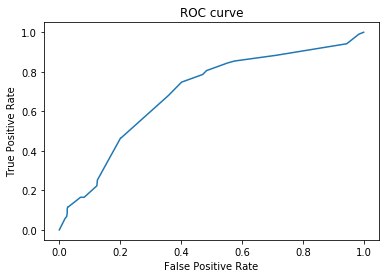

In [21]:
# See the results on a plot. 
# This is the "Receiver Operating Characteristic" curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [22]:
# Use scikit-learn to calculate the area under the curve.
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred_proba)

0.6899113550021106

**Recap:** ROC AUC measures how well a classifier ranks predicted probabilities. So, when you get your classifier’s ROC AUC score, you need to use predicted probabilities, not discrete predictions. 

Your code may look something like this:

```python
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_test_transformed)[:, -1] # Probability for last class
print('Test ROC AUC:', roc_auc_score(y_test, y_pred_proba))
```

ROC AUC ranges from 0 to 1. Higher is better. A naive majority class baseline will have an ROC AUC score of 0.5.

### Permutation and Boosting

In [23]:
    !pip install category_encoders==2.*
    !pip install eli5

In [0]:
#hd = pd.read_csv('framingham.csv', header=0)

In [0]:
from sklearn.model_selection import train_test_split
# Split into Train and Test sets
#train, test = train_test_split(hd, train_size=.80, test_size=0.20,
#                              stratify=hd['TenYearCHD'], random_state=42)
#train.shape,  test.shape

In [0]:
# Split train into train & val
#train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
#                             stratify=train['TenYearCHD'], random_state=42)

#train.shape, val.shape, test.shape

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Read framingham.csv 
hd1 = pd.read_csv('framingham.csv', header=0)

train, test = train_test_split(hd, train_size=.80, test_size=0.20,
                               stratify=hd['TenYearCHD'], random_state=42)
train.shape,  test.shape

# Split train into train & val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['TenYearCHD'], random_state=42)

train.shape, val.shape, test.shape


def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    
    # return the wrangled dataframe
    return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [26]:
train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2211,1,41,3.0,0,0.0,0.0,0,1,0,230.0,150.0,101.0,28.54,75.0,65.0,0
2382,1,46,2.0,1,20.0,0.0,0,0,0,275.0,137.0,88.0,29.28,110.0,88.0,0
3906,0,47,3.0,0,0.0,0.0,0,0,0,230.0,137.0,79.0,27.13,75.0,76.0,1
3469,0,59,1.0,0,0.0,0.0,0,0,0,249.0,138.0,72.0,25.02,60.0,70.0,0
3665,1,49,2.0,0,0.0,0.0,0,0,0,220.0,114.0,82.0,24.68,69.0,60.0,0


In [0]:
# Arrange data into X features matrix and y target vector
target = 'TenYearCHD'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

In [28]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8525073746312685


In [29]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=7)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8451327433628318


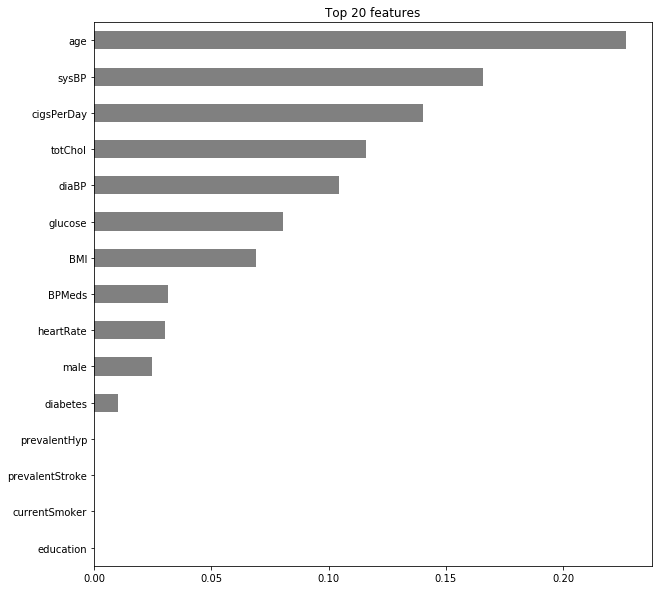

In [30]:
# Get feature importances
rf = pipeline.named_steps['decisiontreeclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

### Drop-Column Importance
Best in theory, but slow

In [32]:
print(X_train.shape)
X_train.head()

(2712, 15)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2211,1,41,3.0,0,0.0,0.0,0,1,0,230.0,150.0,101.0,28.54,75.0,65.0
2382,1,46,2.0,1,20.0,0.0,0,0,0,275.0,137.0,88.0,29.28,110.0,88.0
3906,0,47,3.0,0,0.0,0.0,0,0,0,230.0,137.0,79.0,27.13,75.0,76.0
3469,0,59,1.0,0,0.0,0.0,0,0,0,249.0,138.0,72.0,25.02,60.0,70.0
3665,1,49,2.0,0,0.0,0.0,0,0,0,220.0,114.0,82.0,24.68,69.0,60.0


In [33]:
column  = 'heartRate'

# Fit without column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train.drop(columns=column), y_train)
score_without = pipeline.score(X_val.drop(columns=column), y_val)
print(f'Validation Accuracy without {column}: {score_without}')

# Fit with column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_val, y_val)
print(f'Validation Accuracy with {column}: {score_with}')

# Compare the error with & without column
print(f'Drop-Column Importance for {column}: {score_with - score_without}')

Validation Accuracy without heartRate: 0.8466076696165191
Validation Accuracy with heartRate: 0.8525073746312685
Drop-Column Importance for heartRate: 0.005899705014749346


In [34]:
X_train.heartRate.value_counts()

75.0     368
80.0     239
70.0     198
60.0     148
85.0     146
        ... 
130.0      1
59.0       1
51.0       1
122.0      1
143.0      1
Name: heartRate, Length: 70, dtype: int64

In [35]:
column  = 'heartRate'

# Fit without column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=250, max_depth=7, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train.drop(columns=column), y_train)
score_without = pipeline.score(X_val.drop(columns=column), y_val)
print(f'Validation Accuracy without {column}: {score_without}')

# Fit with column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=250, max_depth=7, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_val, y_val)
print(f'Validation Accuracy with {column}: {score_with}')

# Compare the error with & without column
print(f'Drop-Column Importance for {column}: {score_with - score_without}')

Validation Accuracy without heartRate: 0.8539823008849557
Validation Accuracy with heartRate: 0.8525073746312685
Drop-Column Importance for heartRate: -0.001474926253687281


In [36]:
# Fit with all the columns
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_val, y_val)
print(f'Validation Accuracy with {column}: {score_with}')

for column in X_train.columns:

  # Fit without column
  pipeline = make_pipeline(
      ce.OrdinalEncoder(), 
      SimpleImputer(strategy='median'), 
      RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
  )
  pipeline.fit(X_train.drop(columns=column), y_train)
  score_without = pipeline.score(X_val.drop(columns=column), y_val)

  # Compare the error with & without column
  print(f'Drop-Column Importance for {column}: {score_with - score_without}')

Validation Accuracy with heartRate: 0.8525073746312685
Drop-Column Importance for male: 0.008849557522123908
Drop-Column Importance for age: 0.0
Drop-Column Importance for education: 0.004424778761061954
Drop-Column Importance for currentSmoker: 0.002949852507374673
Drop-Column Importance for cigsPerDay: 0.004424778761061954
Drop-Column Importance for BPMeds: 0.004424778761061954
Drop-Column Importance for prevalentStroke: 0.007374631268436627
Drop-Column Importance for prevalentHyp: 0.007374631268436627
Drop-Column Importance for diabetes: -0.002949852507374562
Drop-Column Importance for totChol: 0.004424778761061954
Drop-Column Importance for sysBP: 0.008849557522123908
Drop-Column Importance for diaBP: 0.002949852507374673
Drop-Column Importance for BMI: 0.008849557522123908
Drop-Column Importance for heartRate: 0.005899705014749346
Drop-Column Importance for glucose: 0.005899705014749346


## 3. Permutation Importance

Permutation Importance is a good compromise between Feature Importance based on impurity reduction (which is the fastest) and Drop Column Importance (which is the "best.")

[The ELI5 library documentation explains,](https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html)

> Importance can be measured by looking at how much the score (accuracy, F1, R^2, etc. - any score we’re interested in) decreases when a feature is not available.
>
> To do that one can remove feature from the dataset, re-train the estimator and check the score. But it requires re-training an estimator for each feature, which can be computationally intensive. ...
>
>To avoid re-training the estimator we can remove a feature only from the test part of the dataset, and compute score without using this feature. It doesn’t work as-is, because estimators expect feature to be present. So instead of removing a feature we can replace it with random noise - feature column is still there, but it no longer contains useful information. This method works if noise is drawn from the same distribution as original feature values (as otherwise estimator may fail). The simplest way to get such noise is to shuffle values for a feature, i.e. use other examples’ feature values - this is how permutation importance is computed.
>
>The method is most suitable for computing feature importances when a number of columns (features) is not huge; it can be resource-intensive otherwise.

### Do-it-yourself way

In [37]:
# Fit with all the data
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_val, y_val)
print(f'Validation Accuracy with {column}: {score_with}')

Validation Accuracy with glucose: 0.8525073746312685


In [38]:
# Before: Sequence of features to be permuted
feature = 'heartRate'
X_val[feature].head()

1905    70.0
3677    60.0
1463    80.0
2314    72.0
798     94.0
Name: heartRate, dtype: float64

In [39]:
# Before: Distribution of quantity
X_val[feature].value_counts()

75.0     74
80.0     71
70.0     41
72.0     40
65.0     40
85.0     40
60.0     35
90.0     30
68.0     27
63.0     22
78.0     17
67.0     15
95.0     14
83.0     14
82.0     13
100.0    12
64.0     12
62.0      9
73.0      9
66.0      8
55.0      8
92.0      8
76.0      8
88.0      7
77.0      7
57.0      7
58.0      7
87.0      7
69.0      6
84.0      6
79.0      6
50.0      5
96.0      5
110.0     5
56.0      4
74.0      4
94.0      4
86.0      4
71.0      4
54.0      3
93.0      3
53.0      2
98.0      2
105.0     1
61.0      1
108.0     1
47.0      1
59.0      1
52.0      1
140.0     1
102.0     1
81.0      1
122.0     1
44.0      1
125.0     1
104.0     1
Name: heartRate, dtype: int64

In [0]:
# Permute the dataset
X_val_permuted = X_val.copy()
X_val_permuted[feature] = np.random.permutation(X_val[feature])

In [41]:
# After: Sequence of features to be permuted
X_val_permuted[feature].head()

1905    60.0
3677    70.0
1463    75.0
2314    85.0
798     77.0
Name: heartRate, dtype: float64

In [42]:
# Distribution hasn't changed!
X_val_permuted[feature].value_counts()

75.0     74
80.0     71
70.0     41
85.0     40
72.0     40
65.0     40
60.0     35
90.0     30
68.0     27
63.0     22
78.0     17
67.0     15
95.0     14
83.0     14
82.0     13
100.0    12
64.0     12
73.0      9
62.0      9
92.0      8
76.0      8
55.0      8
66.0      8
87.0      7
57.0      7
58.0      7
88.0      7
77.0      7
79.0      6
69.0      6
84.0      6
96.0      5
110.0     5
50.0      5
94.0      4
86.0      4
71.0      4
74.0      4
56.0      4
93.0      3
54.0      3
98.0      2
53.0      2
125.0     1
102.0     1
122.0     1
108.0     1
59.0      1
47.0      1
105.0     1
52.0      1
81.0      1
140.0     1
61.0      1
104.0     1
44.0      1
Name: heartRate, dtype: int64

In [43]:
# Get the permutation importance
score_permuted = pipeline.score(X_val_permuted, y_val)

print(f'Validation Accuracy with {column} not permuted: {score_with}')
print(f'Validation Accuracy with {column} permuted: {score_permuted}')
print(f'Permutation Importance for {column}: {score_with - score_permuted}')

Validation Accuracy with glucose not permuted: 0.8525073746312685
Validation Accuracy with glucose permuted: 0.8510324483775811
Permutation Importance for glucose: 0.001474926253687392


### With eli5 library

For more documentation on using this library, see:
- [eli5.sklearn.PermutationImportance](https://eli5.readthedocs.io/en/latest/autodocs/sklearn.html#eli5.sklearn.permutation_importance.PermutationImportance)
- [eli5.show_weights](https://eli5.readthedocs.io/en/latest/autodocs/eli5.html#eli5.show_weights)
- [scikit-learn user guide, `scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules)

eli5 doesn't work with pipelines.

In [44]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)

X_train_transformed = pipeline.fit_transform(X_train)
X_val_transformed = pipeline.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [45]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)
permuter.fit(X_val_transformed, y_val)

Using TensorFlow backend.


PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                                                     

In [46]:
permuter.feature_importances_

array([ 0.00176991,  0.00353982,  0.00471976,  0.00412979,  0.00294985,
       -0.00088496,  0.00029499, -0.00058997,  0.00058997,  0.00884956,
        0.00619469,  0.00648968,  0.00383481, -0.00088496,  0.00442478])

In [47]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_val.columns.tolist()
)

Weight,Feature
0.0088 ± 0.0026,totChol
0.0065 ± 0.0102,diaBP
0.0062 ± 0.0073,sysBP
0.0047 ± 0.0034,education
0.0044 ± 0.0037,glucose
0.0041 ± 0.0022,currentSmoker
0.0038 ± 0.0051,BMI
0.0035 ± 0.0069,age
0.0029 ± 0.0106,cigsPerDay
0.0018 ± 0.0047,male


### We can use importances for feature selection

For example, we can remove features with zero importance. The model trains faster and the score does not decrease.

In [48]:
print('Shape before removing features:', X_train.shape)

Shape before removing features: (2712, 15)


In [0]:
minimum_importance = 0 
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train = X_train[features]

In [50]:
print('Shape after removing features:', X_train.shape)

Shape after removing features: (2712, 12)


In [51]:
X_val = X_val[features]

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Validation Accuracy: 0.8495575221238938


## Use xgboost for gradient boosting

#### [XGBoost Python API Reference: Scikit-Learn API](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)

In [52]:
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, objective='binary:logistic',
                  random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Validation Accuracy: 0.8451327433628318


XGBoost parameters using default- error

In [53]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

model = XGBClassifier(n_estimators=1000,    # <= 1000 trees, early stopping depency
                      max_depth=7,          # try deeper trees with high cardinality data
                      learning_rate=0.2,    # try higher learning rate
                      random_state=42,
                      objective='binary:logistic',
                      n_jobs=-1)

eval_set = [(X_train_encoded, y_train),
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train,
          eval_set=eval_set,
          early_stopping_rounds=50)

[0]	validation_0-error:0.126106	validation_1-error:0.168142
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.122788	validation_1-error:0.166667
[2]	validation_0-error:0.119838	validation_1-error:0.176991
[3]	validation_0-error:0.115782	validation_1-error:0.165192
[4]	validation_0-error:0.112832	validation_1-error:0.169617
[5]	validation_0-error:0.112832	validation_1-error:0.162242
[6]	validation_0-error:0.110619	validation_1-error:0.159292
[7]	validation_0-error:0.108407	validation_1-error:0.160767
[8]	validation_0-error:0.107301	validation_1-error:0.160767
[9]	validation_0-error:0.103982	validation_1-error:0.157817
[10]	validation_0-error:0.102876	validation_1-error:0.156342
[11]	validation_0-error:0.09882	validation_1-error:0.153392
[12]	validation_0-error:0.098083	validation_1-error:0.151917
[13]	validation_0-error:0.09292	validation_1-error:0.1548

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

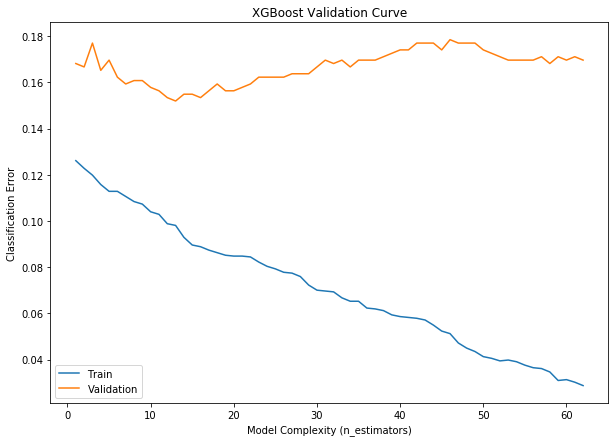

In [54]:
results = model.evals_result()
train_error = results['validation_0']['error']
val_error = results['validation_1']['error']

iterations = range(1, len(train_error) + 1)

plt.figure(figsize=(10,7))
plt.plot(iterations, train_error, label='Train')
plt.plot(iterations, val_error, label='Validation')
plt.title('XGBoost Validation Curve')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.legend();

#### AUC

In [55]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

[0]	validation_0-auc:0.707031	validation_1-auc:0.698902
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.723231	validation_1-auc:0.711625
[2]	validation_0-auc:0.729711	validation_1-auc:0.718455
[3]	validation_0-auc:0.73126	validation_1-auc:0.72645
[4]	validation_0-auc:0.735558	validation_1-auc:0.729168
[5]	validation_0-auc:0.741632	validation_1-auc:0.72634
[6]	validation_0-auc:0.743793	validation_1-auc:0.730798
[7]	validation_0-auc:0.747115	validation_1-auc:0.727607
[8]	validation_0-auc:0.748258	validation_1-auc:0.727683
[9]	validation_0-auc:0.750581	validation_1-auc:0.727691
[10]	validation_0-auc:0.751567	validation_1-auc:0.72694
[11]	validation_0-auc:0.754807	validation_1-auc:0.731693
[12]	validation_0-auc:0.757847	validation_1-auc:0.72997
[13]	validation_0-auc:0.76005	validation_1-auc:0.727775
[14]	validation_0-auc:0.760893	validation_1-auc:0.726526
[15]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
# THIS CELL ISN'T ABOUT THE NEW OBJECTIVES FOR TODAY
# BUT IT IS IMPORTANT FOR YOUR SPRINT CHALLENGE

from sklearn.metrics import roc_auc_score
X_test_processed = processor.transform(X_test)
class_index = 1
y_pred_proba = model.predict_proba(X_test_processed)[:, class_index]
print(f'Test ROC AUC for class {class_index}:')
print(roc_auc_score(y_test, y_pred_proba)) # Ranges from 0-1, higher is better

ValueError: ignored

## Try adjusting these hyperparameters

#### Random Forest
- class_weight (for imbalanced classes)
- max_depth (usually high, can try decreasing)
- n_estimators (too low underfits, too high wastes time)
- min_samples_leaf (increase if overfitting)
- max_features (decrease for more diverse trees)

#### Xgboost
- scale_pos_weight (for imbalanced classes)
- max_depth (usually low, can try increasing)
- n_estimators (too low underfits, too high wastes time/overfits) — Use Early Stopping!
- learning_rate (too low underfits, too high overfits)

For more ideas, see [Notes on Parameter Tuning](https://xgboost.readthedocs.io/en/latest/tutorials/param_tuning.html) and [DART booster](https://xgboost.readthedocs.io/en/latest/tutorials/dart.html).

### MODEL Interpretation 1

In [57]:
example = X_val.iloc[[0]]   # taking first entry in our validation set
example

,male,age,education,currentSmoker,cigsPerDay,prevalentStroke,diabetes,totChol,sysBP,diaBP,BMI,glucose
1905,0,64,1.0,0,0.0,0,0,229.0,145.0,85.0,29.67,74.0


In [58]:
hd['BMI'].describe()

count    4238.000000
mean       25.802008
std         4.070953
min        15.540000
25%        23.080000
50%        25.410000
75%        28.037500
max        56.800000
Name: BMI, dtype: float64

In [59]:
pred = model.predict(example)[0]
print(f'Predicted TenYearCHD: {pred:.2f}%')

ValueError: ignored

In [0]:
import numpy as np

def vary_bmi(model, example):
    print('Vary BMI, hold other features constant', '\n')
    example = example.copy()
    preds = []
    for bmi in range(15, 35, 1):
        example['BMI'] = bmi
        pred = model.predict(example)[0]
        print(f'Predicted Ten Year CHD: {pred:.3f}%')
        print(example.to_string(), '\n')
        preds.append(pred)
    print('Difference between predictions')
    print(np.diff(preds))
        
vary_bmi(pipeline, example)

Vary BMI, hold other features constant 

Predicted Ten Year CHD: 0.000%
      male  age  education  currentSmoker  cigsPerDay  prevalentStroke  diabetes  totChol  sysBP  diaBP  BMI  glucose
1905     0   64        1.0              0         0.0                0         0    229.0  145.0   85.0   15     74.0 

Predicted Ten Year CHD: 0.000%
      male  age  education  currentSmoker  cigsPerDay  prevalentStroke  diabetes  totChol  sysBP  diaBP  BMI  glucose
1905     0   64        1.0              0         0.0                0         0    229.0  145.0   85.0   16     74.0 

Predicted Ten Year CHD: 0.000%
      male  age  education  currentSmoker  cigsPerDay  prevalentStroke  diabetes  totChol  sysBP  diaBP  BMI  glucose
1905     0   64        1.0              0         0.0                0         0    229.0  145.0   85.0   17     74.0 

Predicted Ten Year CHD: 0.000%
      male  age  education  currentSmoker  cigsPerDay  prevalentStroke  diabetes  totChol  sysBP  diaBP  BMI  glucose
190

In [0]:
example2 = X_val.iloc[[2]]
vary_bmi(model, example2)

Vary BMI, hold other features constant 

Predicted Ten Year CHD: 1.000%
      male  age  education  currentSmoker  cigsPerDay  prevalentStroke  diabetes  totChol  sysBP  diaBP  BMI  glucose
1463     1   51        1.0              1        50.0                0         0    335.0  125.5   94.0   15     67.0 

Predicted Ten Year CHD: 1.000%
      male  age  education  currentSmoker  cigsPerDay  prevalentStroke  diabetes  totChol  sysBP  diaBP  BMI  glucose
1463     1   51        1.0              1        50.0                0         0    335.0  125.5   94.0   16     67.0 

Predicted Ten Year CHD: 1.000%
      male  age  education  currentSmoker  cigsPerDay  prevalentStroke  diabetes  totChol  sysBP  diaBP  BMI  glucose
1463     1   51        1.0              1        50.0                0         0    335.0  125.5   94.0   17     67.0 

Predicted Ten Year CHD: 1.000%
      male  age  education  currentSmoker  cigsPerDay  prevalentStroke  diabetes  totChol  sysBP  diaBP  BMI  glucose
146

In [0]:
example2

,male,age,education,currentSmoker,cigsPerDay,prevalentStroke,diabetes,totChol,sysBP,diaBP,BMI,glucose
1463,1,51,1.0,1,50.0,0,0,335.0,125.5,94.0,27.77,67.0


### Partial Dependence Plots

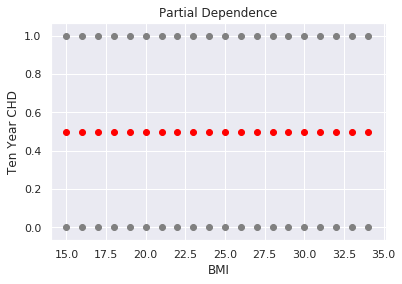

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()

examples = pd.concat([example, example2])
for bmi in range(15, 35, 1):
    examples['BMI'] = bmi
    preds = model.predict(examples)  #model.predict_proba
    for pred in preds:
        plt.scatter(bmi, pred, color='grey')
    plt.scatter(bmi, np.mean(preds), color='red')
    plt.title('Partial Dependence')
    plt.xlabel('BMI')
    plt.ylabel('Ten Year CHD')

In [0]:
# Later, when you save matplotlib images to include in blog posts or web apps,
# increase the dots per inch (double it), so the text isn't so fuzzy
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72   # makes your code look nicer

In [0]:
from pdpbox.pdp import pdp_isolate, pdp_plot

In [0]:
feature='BMI'

isolated = pdp_isolate(
    model = model,
    dataset = X_val,
    model_features = X_val.columns,
    feature = feature
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


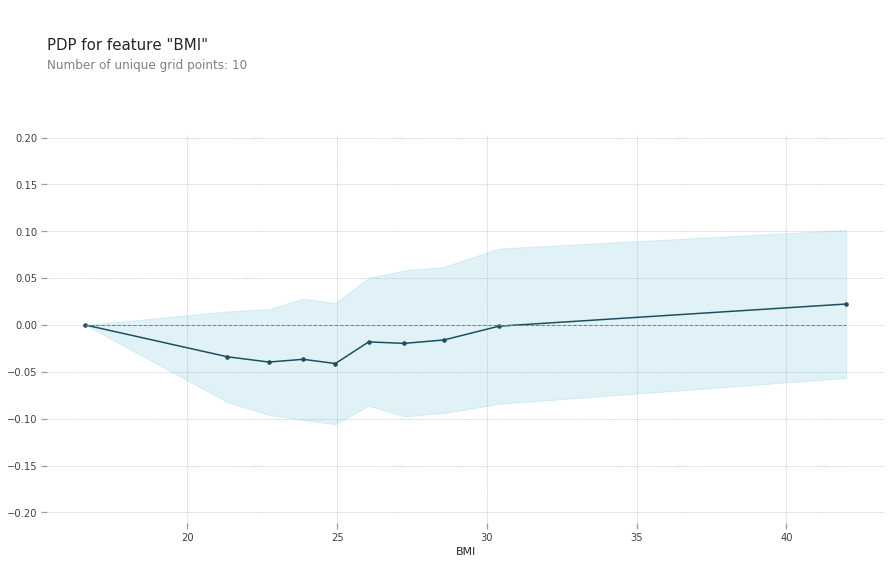

In [0]:
pdp_plot(isolated, feature_name=feature);

(14, 40)

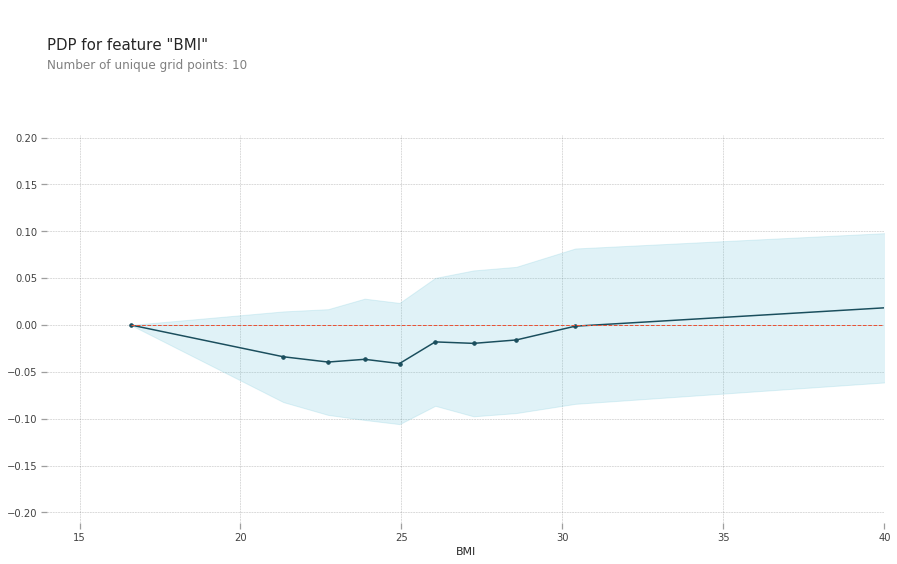

In [0]:
pdp_plot(isolated, feature_name=feature)  #limits to region we care about
plt.xlim(14, 40)

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc38f74fe80>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc38f76f160>})

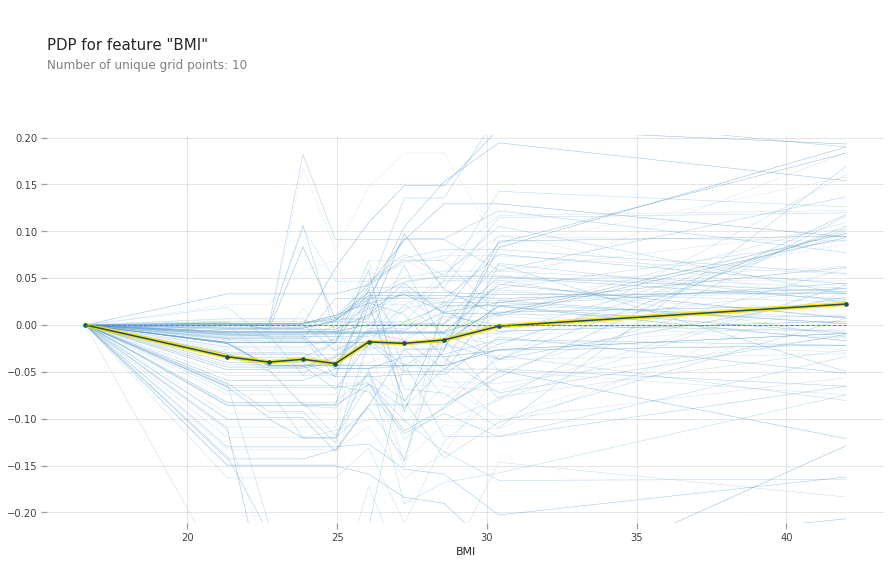

In [0]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100)
#plt.xlim(0, 150)

In [0]:
isolated = pdp_isolate(
    model = model,
    dataset = X_val,
    model_features = X_val.columns,
    feature = feature,
    num_grid_points=50
)

In [0]:
len(X_val) * 50

33900

(14, 40)

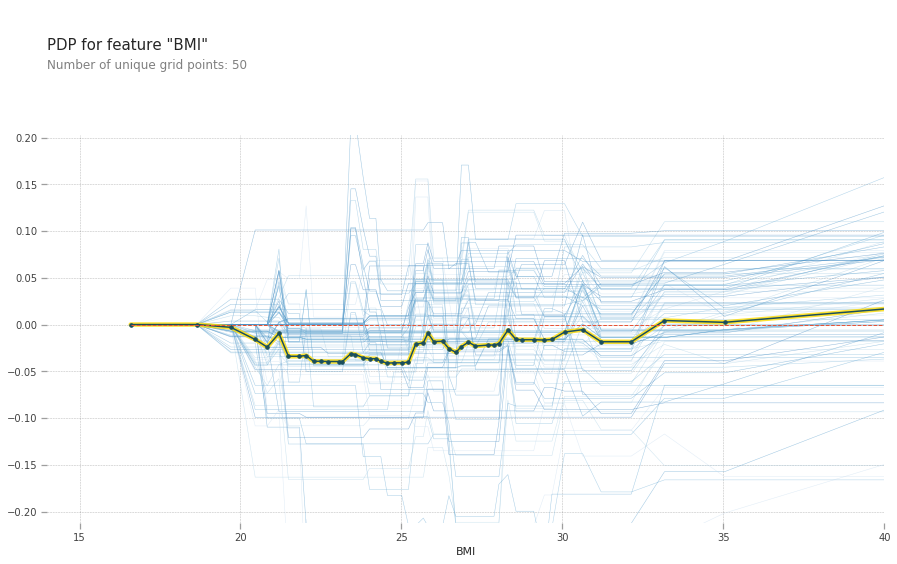

In [0]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100)
plt.xlim(14, 40)

### Customize

In [0]:
dir(isolated)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_type',
 'count_data',
 'display_columns',
 'feature',
 'feature_grids',
 'feature_type',
 'hist_data',
 'ice_lines',
 'n_classes',
 'pdp',
 'percentile_info',
 'which_class']

In [0]:
grid = isolated.feature_grids
pdp = isolated.pdp
pdp

array([0.20218699, 0.20218699, 0.19920723, 0.18621747, 0.17803337,
       0.19268489, 0.16826274, 0.16826274, 0.16907273, 0.16288304,
       0.16288304, 0.16263495, 0.16263495, 0.16263495, 0.17110386,
       0.17013331, 0.16667357, 0.16567075, 0.16567075, 0.16279536,
       0.16091877, 0.16120991, 0.16127588, 0.16191196, 0.1812771 ,
       0.18256277, 0.19307198, 0.18394469, 0.18434224, 0.17646405,
       0.17244413, 0.17850621, 0.1833151 , 0.17915173, 0.18023051,
       0.18023051, 0.1817891 , 0.19614239, 0.18619274, 0.18597846,
       0.18597846, 0.18559465, 0.18619719, 0.19412756, 0.19670378,
       0.18377683, 0.18377683, 0.20649546, 0.20453824, 0.2245592 ],
      dtype=float32)

In [0]:
lines = isolated.ice_lines.sample(100).T

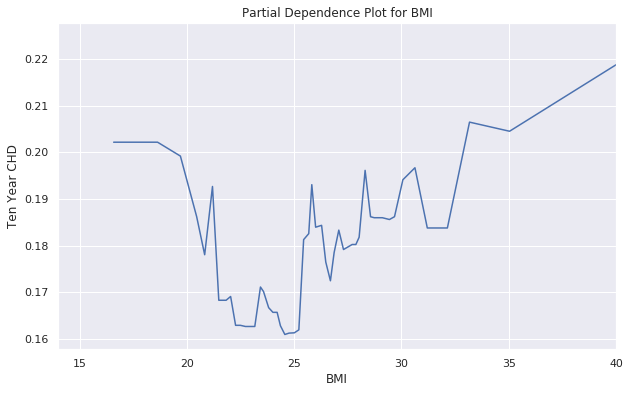

In [0]:
plt.figure(figsize=(10,6))
plt.plot(grid, pdp)
plt.xlim(14,40)
plt.ylabel('Ten Year CHD')
plt.xlabel('BMI')
plt.title('Partial Dependence Plot for BMI');

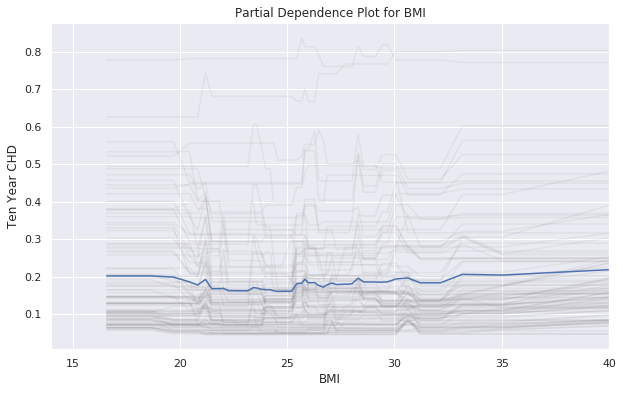

In [0]:
lines.plot(color='grey', alpha=0.1, legend=False, figsize=(10,6))
plt.plot(grid, pdp)
plt.xlim(14,40)
plt.ylabel('Ten Year CHD')
plt.xlabel('BMI')
plt.title('Partial Dependence Plot for BMI');

### Partial Dependence Plots with 2 features

Be aware of a bug in PDPBox version <=0.20:
- With the pdp_interact_plot function, plot_type='contour' gets an error, but plot_type='grid' works
- This will be fixed in the next release of PDPbox

In [0]:
X_val.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'prevalentStroke', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'glucose'],
      dtype='object')

(<Figure size 540x684 with 3 Axes>,
 {'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc38f4039b0>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc38f42ec88>})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


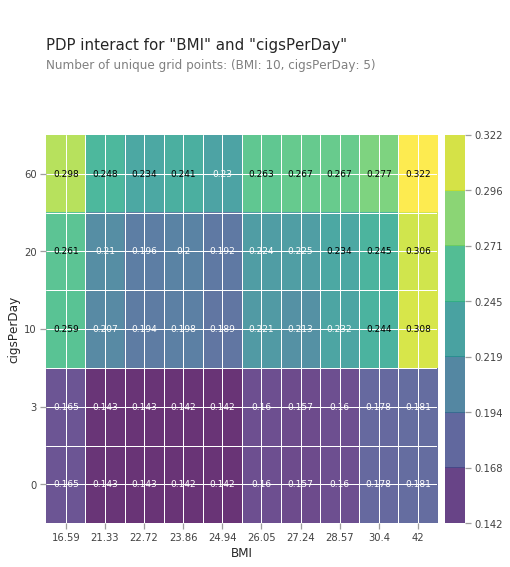

In [0]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features=['BMI', 'cigsPerDay']

interaction = pdp_interact(
    model=model,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features)

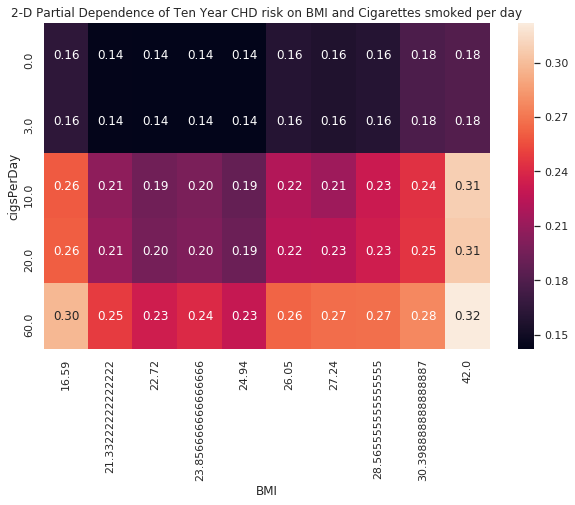

In [0]:
pdp = interaction.pdp.pivot_table(
    values='preds',
    columns=features[0],
    index=features[1]
)

plt.figure(figsize=(10,6))
sns.heatmap(pdp, annot=True, fmt='.2f')
plt.title('2-D Partial Dependence of Ten Year CHD risk on BMI and Cigarettes smoked per day');

### 3D with Plotly

In [0]:
import plotly.graph_objs as go

surface = go.Surface(
    x=pdp.columns,
    y=pdp.index,
    z=pdp.values
)

fig = go.Figure(surface)
fig.show()

In [0]:
pdp.columns

Float64Index([             16.59,  21.33222222222222,              22.72,
              23.856666666666666,              24.94,              26.05,
                           27.24, 28.565555555555555, 30.398888888888887,
                            42.0],
             dtype='float64', name='BMI')

In [0]:
pdp = pdp.drop(columns=[16.59, 42])

In [0]:
surface = go.Surface(
    x=pdp.columns,
    y=pdp.index,
    z=pdp.values
)

layout = go.Layout(
    scene= dict(
        xaxis=dict(title=features[0]),
        yaxis=dict(title=features[1]),
        zaxis=dict(title=target)
    )
)

fig = go.Figure(surface, layout)
fig.show()

#### LECTURE - Partial Dependence Plots with Categorical Features
1. Recommend you use Ordinal encoder or Target Encoder, outside of pipeline, to encode your data first. (If there is a natural ordering, then take the time to encode it that way, instead of random integers.) Then use the encoded data with pdpbox
2. There's some extra work to get readable category namese on your plot, instead of integer category codes

In [0]:
# Fit a model on Titanic data
import category_encoders as ce
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

df = sns.load_dataset('titanic')
df.age = df.age.fillna(df.age.median())
df = df.drop(columns='deck')
df = df.dropna()

target = 'survived'
features = df.columns.drop(['survived', 'alive'])

X = df[features]
y = df[target]

# Use Ordinal Encoder, outside of a pipeline
encoder = ce.OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_encoded, y)

In [0]:
# Use Pdpbox
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()
from pdpbox import pdp

feature = 'sex'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

In [0]:
# Look at the encoder's mappings
encoder.mapping

In [0]:
pdp.pdp_plot(pdp_dist, feature)

# Manually change the xticks labels
plt.xticks([1, 2], ['male', 'female']);

In [0]:
# Let's automate it
feature = 'sex'
for item in encoder.mapping:
    if item['col'] == feature:
        feature_mapping = item['mapping']
        
feature_mapping = feature_mapping[feature_mapping.index.dropna()]
category_names = feature_mapping.index.tolist()
category_codes = feature_mapping.values.tolist()

In [0]:
pdp.pdp_plot(pdp_dist, feature)

# Automatically change the xticks labels
plt.xticks(category_codes, category_names);

In [0]:
features = ['sex', 'age']

interaction = pdp_interact(
    model=model, 
    dataset=X_encoded, 
    model_features=X_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [0]:
pdp = interaction.pdp.pivot_table(
    values='preds', 
    columns=features[0], # First feature on x axis
    index=features[1]    # Next feature on y axis
)[::-1]  # Reverse the index order so y axis is ascending

pdp = pdp.rename(columns=dict(zip(category_codes, category_names)))
plt.figure(figsize=(10,8))
sns.heatmap(pdp, annot=True, fmt='.2f', cmap='viridis')
plt.title('Partial Dependence of Titanic survival, on sex & age');

### Mode Interpretation 2

In [0]:
!pip install shap

     |████████████████████████████████| 266kB 3.6MB/s 
  Created wheel for shap: filename=shap-0.33.0-cp36-cp36m-linux_x86_64.whl size=382267 sha256=979df556956acf3e46c681eee04e14fd98e406663d5bd843ef86fdb07c5e34bd
  Stored in directory: /root/.cache/pip/wheels/39/0f/88/a8124d43431284e10f263ffe449e119344c6145c3a165d186c
Successfully built shap


### TRY SHAP

In [0]:
hd = pd.read_csv('framingham.csv', header=0)

In [0]:
from sklearn.model_selection import train_test_split
# Split into Train and Test sets
train, test = train_test_split(hd, train_size=.80, test_size=0.20,
                               stratify=hd['TenYearCHD'], random_state=42)
train.shape,  test.shape

((3390, 16), (848, 16))

In [0]:
# Split train into train & val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['TenYearCHD'], random_state=42)

train.shape, val.shape, test.shape

((2712, 16), (678, 16), (848, 16))

In [0]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

target = 'TenYearCHD'
features = hd.columns.drop([target])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=3)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

ValueError: ignored

In [0]:
# "The ROC curve is created by plotting the true positive rate (TPR) 
# against the false positive rate (FPR) 
# at various threshold settings."

# Use scikit-learn to calculate TPR & FPR at various thresholds
from sklearn.metrics import roc_curve
y_pred_proba = pipeline.predict_proba(X_val)[:, -1] # Probability for last class
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

In [0]:
# See the results in a table
pd.DataFrame({
    'False Positive Rate': fpr, 
    'True Positive Rate': tpr, 
    'Threshold': thresholds
})

### Look at predictions vs actuals

In [0]:
df = pd.DataFrame({
    'BMI': bmi, 
    'pred_proba': y_pred_proba, 
    'TenYearCHD': y_test
})

#df = df.merge(
#     history[['id', 'issue_d', 'sub_grade', 'percent_paid', 'term', 'int_rate']], 
#     how='left'
#)

NameError: ignored

In [0]:
df.head()

In [0]:
fully_paid = df['status_group'] == 'Fully Paid'
charged_off = ~fully_paid
right = (fully_paid) == (df['pred_proba'] > 0.50)
wrong = ~right

In [0]:
df[fully_paid & right].sample(n=10, random_state=1).sort_values(by='pred_proba', ascending=False)

In [0]:
row = X_test.iloc[[3094]]
explainer=shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row,
    link='logit'               # For classification, this returns predicted probs
)

## Make a function to explain predictions

Goal Output:

```
The model predicts this loan is Fully Paid, with 74% probability.
 
 
Top 3 reasons for prediction:
1. dti is 10.97.
2. term is  36 months.
3. total_acc is 45.0.
 
 
Top counter-argument against prediction:
- sub_grade is 4.2.
 
<INSERT SHAPLEY VALUE FORCE PLOT HERE>

In [0]:
def explain(row_number):
    positive_class = 'BMI'
    positive_class_index = 1

    # Get & process the data for the row
    row = X_test.iloc[[row_number]]
    row_processed = processor.transform(row)

    # Make predictions (includes predicted probability)
    pred = model.predict(row_processed)[0]
    pred_proba = model.predict_proba(row_processed)[0, positive_class_index]
    pred_proba *= 100
    if pred != positive_class:
        pred_proba = 100 - pred_proba

    # Show predictiion & probability
    print(f'The model predicts this loan is {pred}, with {pred_proba:.0f}% probability.')
    
    # Get shapley additive explanations
    shap_values = explainer.shap_values(row_processed)

    # Get top 3 "pros & cons" for fully paid
    feature_names = row.columns
    feature_values = row.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))
    pros = shaps.sort_values(ascending=False)[:3].index
    cons = shaps.sort_values(ascending=True)[:3].index

    # Show top 3 reason for prediction
    print('\n')
    print('Top 3 reasons for prediction:')
    evidence = pros if pred == positive_class else cons
    for i, info in enumerate(evidence, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} is {feature_value}.')

    # Show top 1 counter-argument against prediction
    print('\n')
    print('Top counter-argument against prediction:')
    evidence = cons if pred == positive_class else pros
    feature_name, feature_value = evidence[0]
    print(f'- {feature_name} is {feature_value}.')

    # Show Shapley Values Force Plot
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values, 
        features=row, 
        link='logit' # For classification, this shows predicted probabilities
    )

explain(3094)

IndexError: ignored